<a href="https://colab.research.google.com/github/tanishqa321/face_emotion_detection/blob/main/facial%20emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2024-05-21 08:43:49--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2024-05-21 08:43:51--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc3ec66ba8b2000e9f52f73e83f.dl.dropboxusercontent.com/cd/0/inline/CTRtZ0wzuMx9zY47AQjoQoyJytuwbVBJ6TAyLsVI2Q1h2zYk-gSNuB5GoiUL1lhw8TEUYQCEdKrP8P0sTbIH8pMFIu3ukI3pHbwbsoLYQdx1fz-1oQ7zycNybo5vq8J52tlm1lLjLxVn0O5mO9b1Z7sf/file# [following]
--2024-05-21 08:43:51--  https://ucc3ec66ba8b2000e9f52f73e83f.dl.dropboxusercontent.com/cd/0/inline/CTRtZ0wzuMx9zY47AQjoQoyJytuwbVBJ6TAyLsVI2Q1h2zYk-gSNuB5GoiUL1lhw8TEUYQCEdKrP8P0sTbIH8pMFIu3ukI3pHb

In [2]:

!unzip dataset.zip?dl=0


Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy


In [4]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [5]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [6]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [7]:

val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


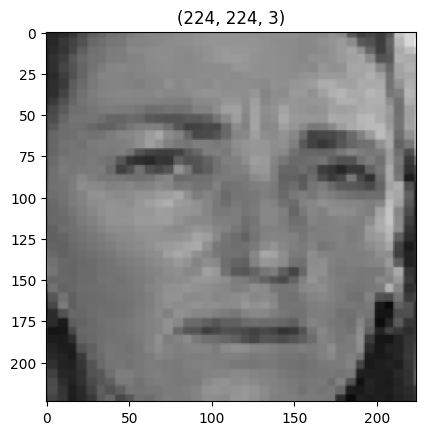

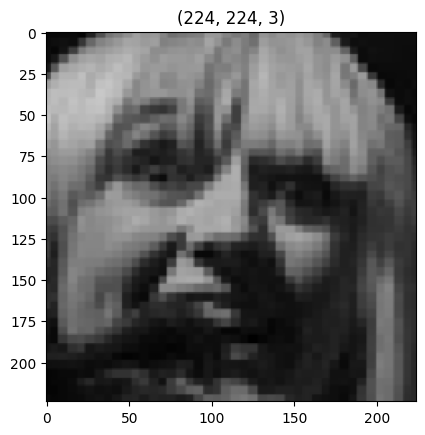

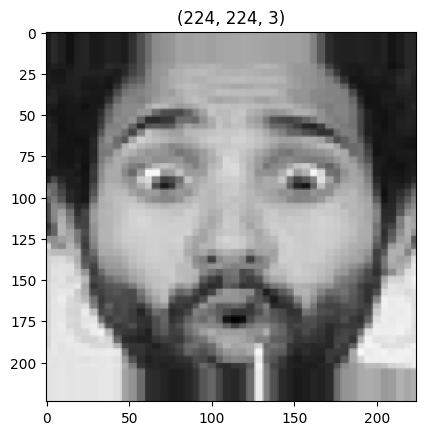

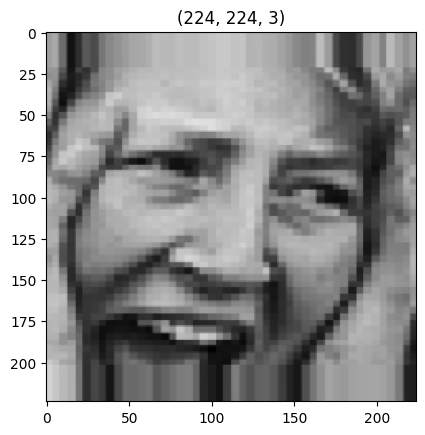

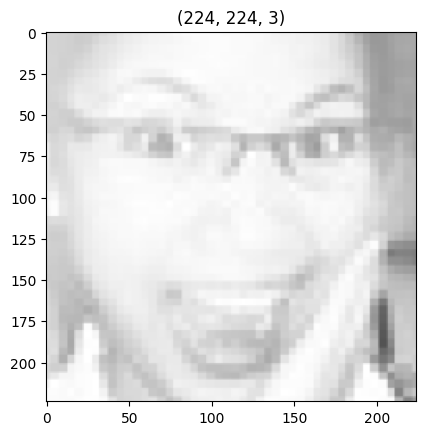

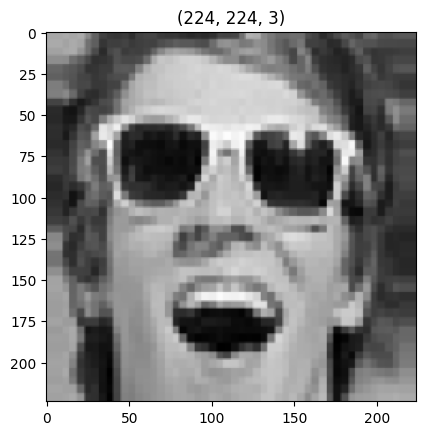

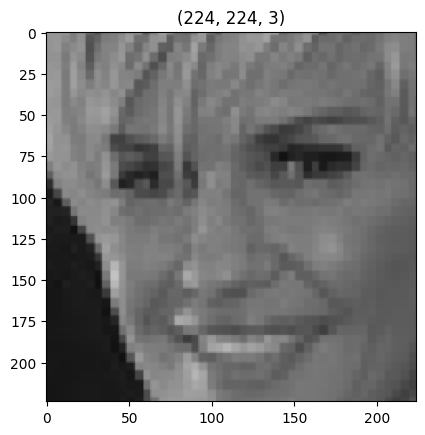

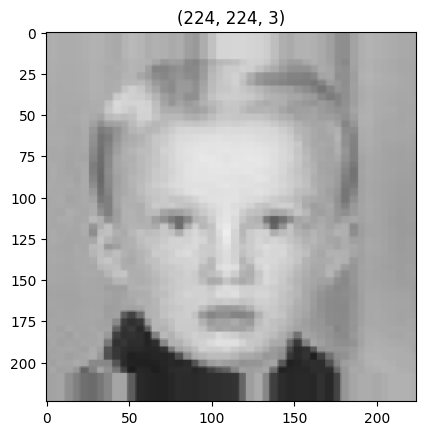

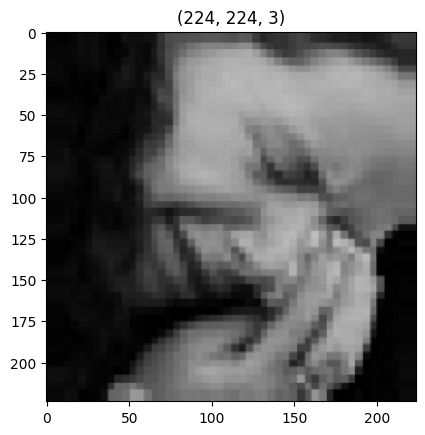

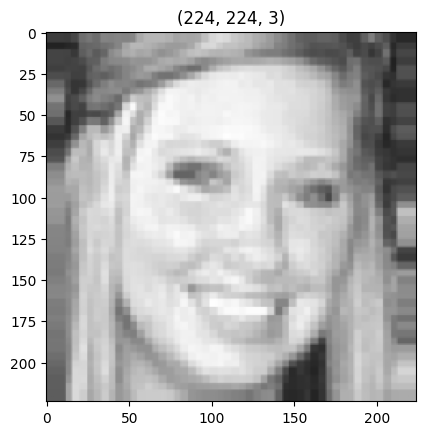

In [8]:
t_img , label = train_data.next()


def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

plotImages(t_img, label)

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]

In [10]:
hist = model.fit_generator(train_data,
                           steps_per_epoch= 10,
                           epochs= 30,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[es,mc])

<ipython-input-10-f681b3c69731>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 11.0903 - accuracy: 0.2469
Epoch 1: val_accuracy improved from -inf to 0.34375, saving model to best_model.h5
10/10 [==============================] - 33s 3s/step - loss: 11.0903 - accuracy: 0.2469 - val_loss: 6.7571 - val_accuracy: 0.3438


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 8.3348 - accuracy: 0.3469
Epoch 2: val_accuracy did not improve from 0.34375
10/10 [==============================] - 28s 3s/step - loss: 8.3348 - accuracy: 0.3469 - val_loss: 9.0582 - val_accuracy: 0.3086
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 6.5255 - accuracy: 0.3906
Epoch 3: val_accuracy improved from 0.34375 to 0.35547, saving model to best_model.h5
10/10 [==============================] - 37s 4s/step - loss: 6.5255 - accuracy: 0.3906 - val_loss: 8.6668 - val_accuracy: 0.3555
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 7.2948 - accuracy: 0.3219
Epoch 4: val_accuracy improved from 0.35547 to 0.43359, saving model to best_model.h5
10/10 [==============================] - 38s 4s/step - loss: 7.2948 - accuracy: 0.3219 - val_loss: 5.1664 - val_accuracy: 0.4336
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 5.9606 - accuracy: 0.3531
Epoch 5: val_a

In [11]:
from keras.models import load_model
model = load_model("/content/best_model.h5")

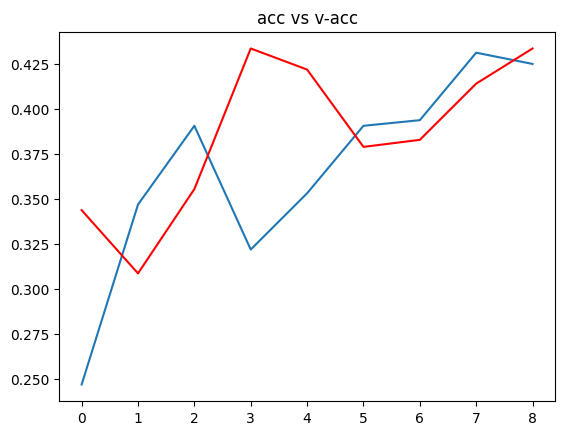

In [12]:
h =  hist.history
h.keys()
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

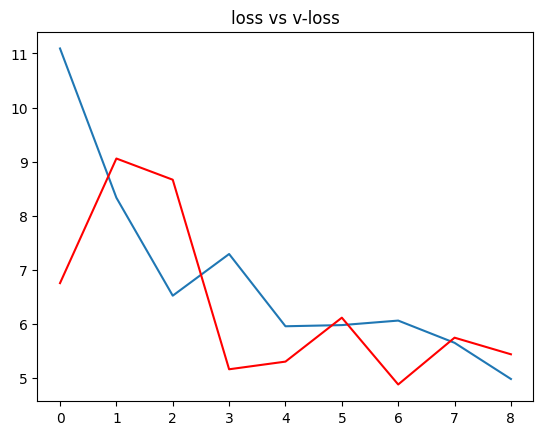

In [13]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

1/1 [==============================] - 1s 516ms/step
 the image is of disgust


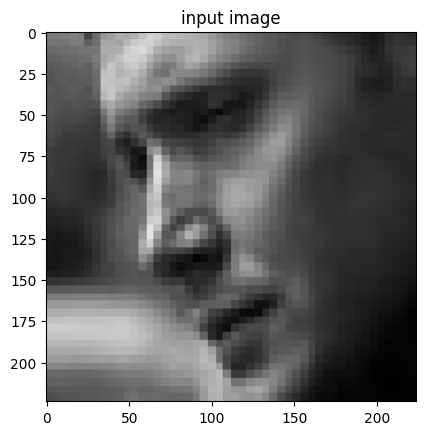

In [14]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))
path = "/content/test/angry/PrivateTest_1054527.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()